# EnMAP

This notebook requires the `cloudsen12_models` package
```
pip install georeader-spaceml cloudsen12_models fsspec
```

In [1]:
from georeader.readers import enmap
from cloudsen12_models import cloudsen12
from georeader import plot

xml_file = "tempEnMAP/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z-METADATA.XML"
enmap_reader = enmap.EnMAP(xml_file,by_folder=False)
enmap_reader

/home/gonzalo/mambaforge/envs/georeader3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



        File: tempEnMAP/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z/ENMAP01-____L1B-DT0000074101_20240511T080843Z_001_V010402_20240514T093550Z-METADATA.XML
        Bounds: (47.42948365009492, 29.213144376313977, 47.8031320641908, 29.53032430940031)
        Time: 2024-05-11 08:08:43.855554+00:00
        Spatial shape (height, width): (1024, 1000)
        VNIR Range: (411.42039, 1003.9755) nbands: 91 
        SWIR Range: (892.78475, 2452.4581000000003) nbands: 133
        

CPU times: user 588 ms, sys: 940 ms, total: 1.53 s
Wall time: 406 ms


<Axes: >

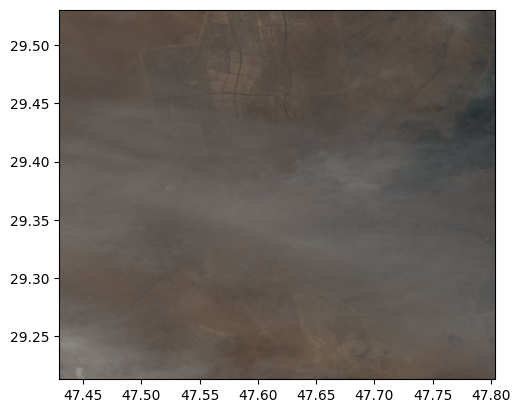

In [14]:
%%time

rgb = enmap_reader.load_rgb(apply_rpcs=False)
plot.show(rgb)

In [3]:
from georeader.readers import S2_SAFE_reader

srf = S2_SAFE_reader.read_srf("S2A")
srf

/home/gonzalo/mambaforge/envs/georeader3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


B01  B02  B03  B04  B05  B06  B07  B08  B8A  B09  B10  B11  \
SR_WL                                                                    
412    0.001776  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
413    0.004073  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
414    0.003626  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
415    0.003515  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
416    0.005729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2316   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2317   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2318   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2319   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2320   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            B12  
SR_WL            
412    0.000000  
413    0.000000  
414    0.000000  
415    0.000000  
416    0.000000  
...         ...  
2316   0.010984  
2317   0.007360  
2318   0.006491  
2319   0.004697  
2320   0.002059  

[877 rows x 13 columns]

In [4]:
%%time

# Load swir in enmap_reader.units (i.e. radiance units)
swir = enmap_reader.load_product("SPECTRAL_IMAGE_SWIR")

CPU times: user 12.4 s, sys: 1.11 s, total: 13.5 s
Wall time: 13.5 s


In [5]:
from georeader import reflectance

bands_s2_swir = ["B09","B10","B11","B12"]
s2bandsswir = reflectance.transform_to_srf(swir, 
                                           srf[bands_s2_swir],
                                           wavelengths_hyperspectral=enmap_reader.wl_center["swir"],
                                           as_reflectance=True,
                                           observation_date_corr_factor=enmap_reader.observation_date_correction_factor,
                                           verbose=True,
                                           units=enmap_reader.units)

s2bandsswir

2024-10-30 10:31:40(0/4) Processing band B09
2024-10-30 10:31:40	 Loading 4 bands
2024-10-30 10:31:40	 bands loaded, computing tensor
2024-10-30 10:31:40(1/4) Processing band B10
2024-10-30 10:31:40	 Loading 5 bands
2024-10-30 10:31:40	 bands loaded, computing tensor
2024-10-30 10:31:41(2/4) Processing band B11
2024-10-30 10:31:41	 Loading 13 bands
2024-10-30 10:31:41	 bands loaded, computing tensor
2024-10-30 10:31:41(3/4) Processing band B12
2024-10-30 10:31:41	 Loading 30 bands
2024-10-30 10:31:41	 bands loaded, computing tensor


 
         Transform: | 0.00,-0.00, 47.50|
|-0.00,-0.00, 29.53|
| 0.00, 0.00, 1.00|
         Shape: (4, 1024, 1000)
         Resolution: (0.0003069912745516993, 0.0002759618727434178)
         Bounds: (47.42948365009492, 29.213144376313977, 47.8031320641908, 29.53032430940031)
         CRS: EPSG:4326
         fill_value_default: 0.0
        

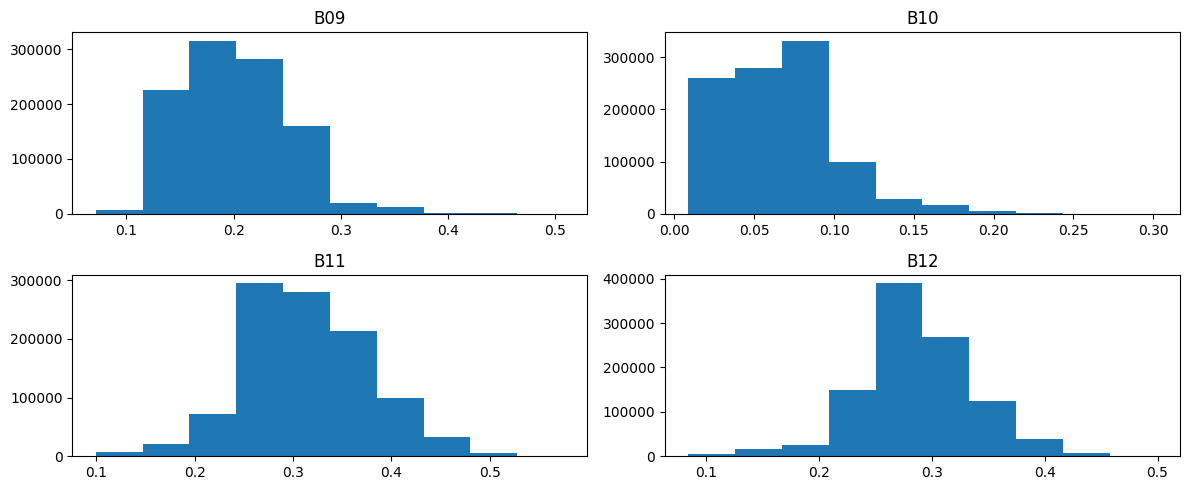

In [6]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(2,2,figsize=(12,5), tight_layout=True)
ax =ax.flatten()

for i,b in enumerate(bands_s2_swir):
    ax[i].hist(s2bandsswir.values[i].ravel())
    ax[i].set_title(b)

In [7]:
vnir = enmap_reader.load_product("SPECTRAL_IMAGE_VNIR")
bands_s2_vnir = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A"]
s2bandsvnir = reflectance.transform_to_srf(vnir, 
                                           srf[bands_s2_vnir],
                                           wavelengths_hyperspectral=enmap_reader.wl_center["vnir"],
                                           as_reflectance=True,
                                           observation_date_corr_factor=enmap_reader.observation_date_correction_factor,
                                           verbose=True,
                                           extrapolate=True,
                                           units=enmap_reader.units)
s2bandsvnir

2024-10-30 10:31:52(0/9) Processing band B01
2024-10-30 10:31:52	 Loading 8 bands
2024-10-30 10:31:52	 bands loaded, computing tensor
2024-10-30 10:31:52(1/9) Processing band B02
2024-10-30 10:31:52	 Loading 18 bands
2024-10-30 10:31:52	 bands loaded, computing tensor
2024-10-30 10:31:53(2/9) Processing band B03
2024-10-30 10:31:53	 Loading 9 bands
2024-10-30 10:31:53	 bands loaded, computing tensor
2024-10-30 10:31:53(3/9) Processing band B04
2024-10-30 10:31:53	 Loading 7 bands
2024-10-30 10:31:53	 bands loaded, computing tensor
2024-10-30 10:31:53(4/9) Processing band B05
2024-10-30 10:31:53	 Loading 4 bands
2024-10-30 10:31:53	 bands loaded, computing tensor
2024-10-30 10:31:53(5/9) Processing band B06
2024-10-30 10:31:53	 Loading 4 bands
2024-10-30 10:31:53	 bands loaded, computing tensor
2024-10-30 10:31:53(6/9) Processing band B07
2024-10-30 10:31:53	 Loading 4 bands
2024-10-30 10:31:53	 bands loaded, computing tensor
2024-10-30 10:31:53(7/9) Processing band B08
2024-10-30 10:31

 
         Transform: | 0.00,-0.00, 47.50|
|-0.00,-0.00, 29.53|
| 0.00, 0.00, 1.00|
         Shape: (9, 1024, 1000)
         Resolution: (0.0003069912745516993, 0.0002759618727434178)
         Bounds: (47.42948365009492, 29.213144376313977, 47.8031320641908, 29.53032430940031)
         CRS: EPSG:4326
         fill_value_default: 0.0
        

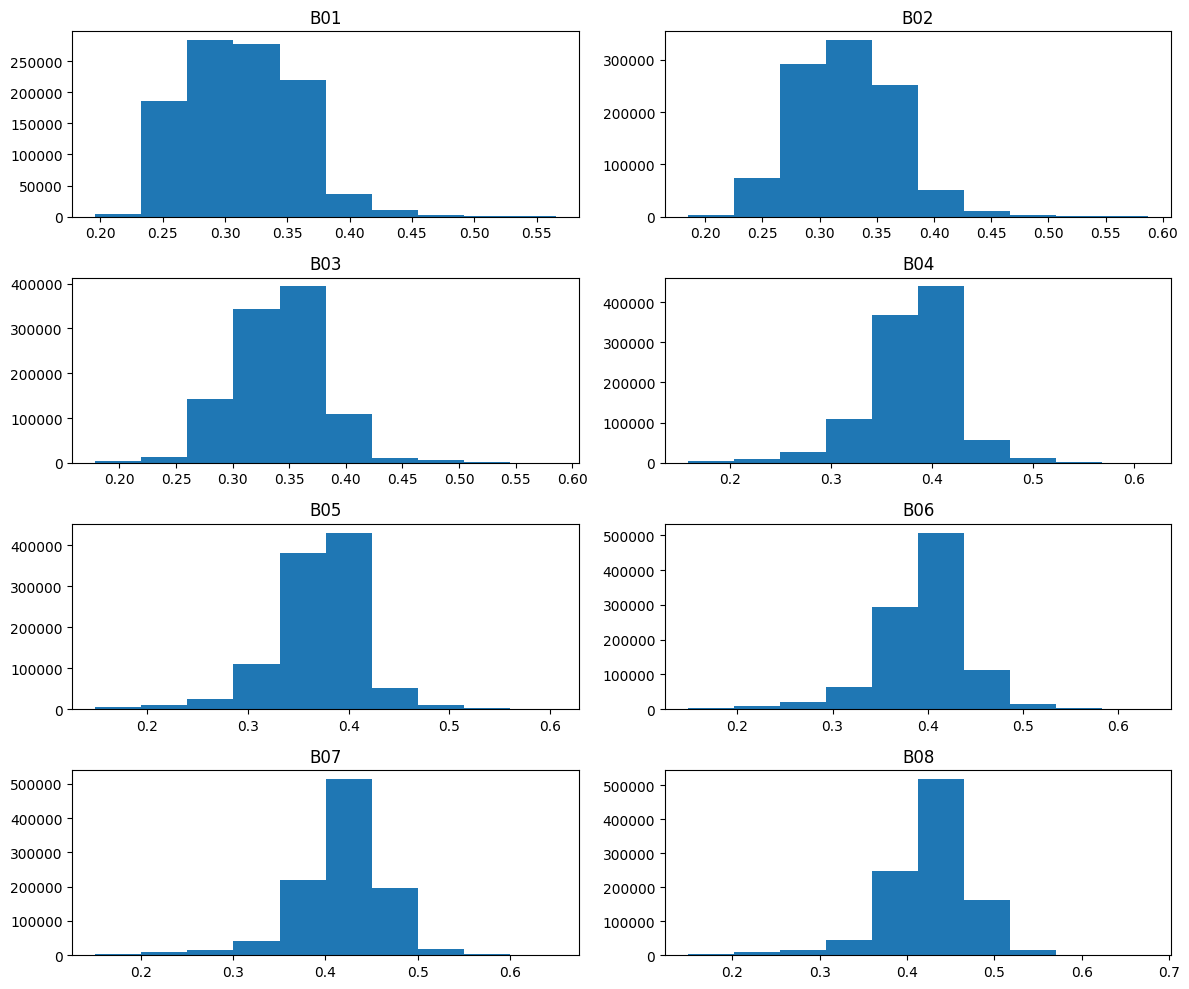

In [8]:
fig, ax =plt.subplots(4,2,figsize=(12,10), tight_layout=True)
ax =ax.flatten()

for i,b in enumerate(bands_s2_vnir[:-1]):
    ax[i].hist(s2bandsvnir.values[i].ravel())
    ax[i].set_title(b)

/home/gonzalo/git/georeader/georeader/plot.py:119: UserWarning: The transform is not rectilinear. The x and y ticks and the scale bar are not going to be correct. To discard this warning use: warnings.filterwarnings('ignore', message='The transform is not rectilinear.')
  warnings.warn("The transform is not rectilinear. The x and y ticks and the scale bar are not going to be correct."


<Axes: >

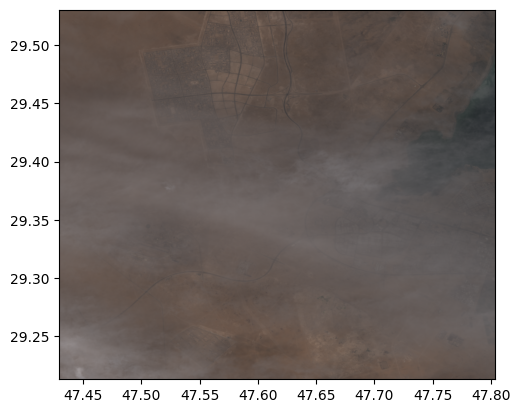

In [9]:
rgb_s2 = s2bandsvnir.isel({"band": [3,2,1]})
plot.show(rgb_s2)

In [10]:
from georeader.geotensor import GeoTensor
import numpy as np
s2_image = GeoTensor(np.concatenate([s2bandsvnir.values, s2bandsswir.values],axis=0),
                     transform=s2bandsswir.transform, crs=s2bandsswir.crs, 
                     fill_value_default=s2bandsswir.fill_value_default)
s2_image

 
         Transform: | 0.00,-0.00, 47.50|
|-0.00,-0.00, 29.53|
| 0.00, 0.00, 1.00|
         Shape: (13, 1024, 1000)
         Resolution: (0.0003069912745516993, 0.0002759618727434178)
         Bounds: (47.42948365009492, 29.213144376313977, 47.8031320641908, 29.53032430940031)
         CRS: EPSG:4326
         fill_value_default: 0.0
        

<Axes: >

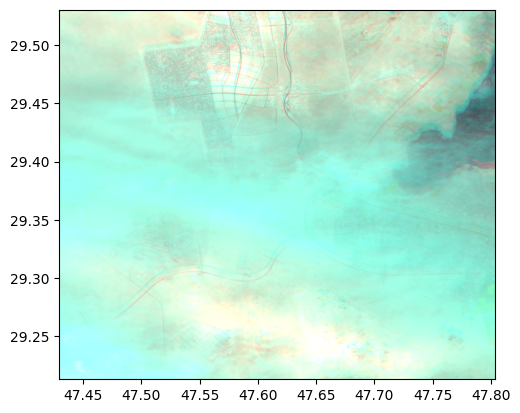

In [11]:
swir_nir_red = (s2_image.isel({"band": [S2_SAFE_reader.BANDS_S2_L1C.index(b) for b in ["B11", "B08", "B04"]]}) / .45).clip(0,1)

plot.show(swir_nir_red)

<Axes: >

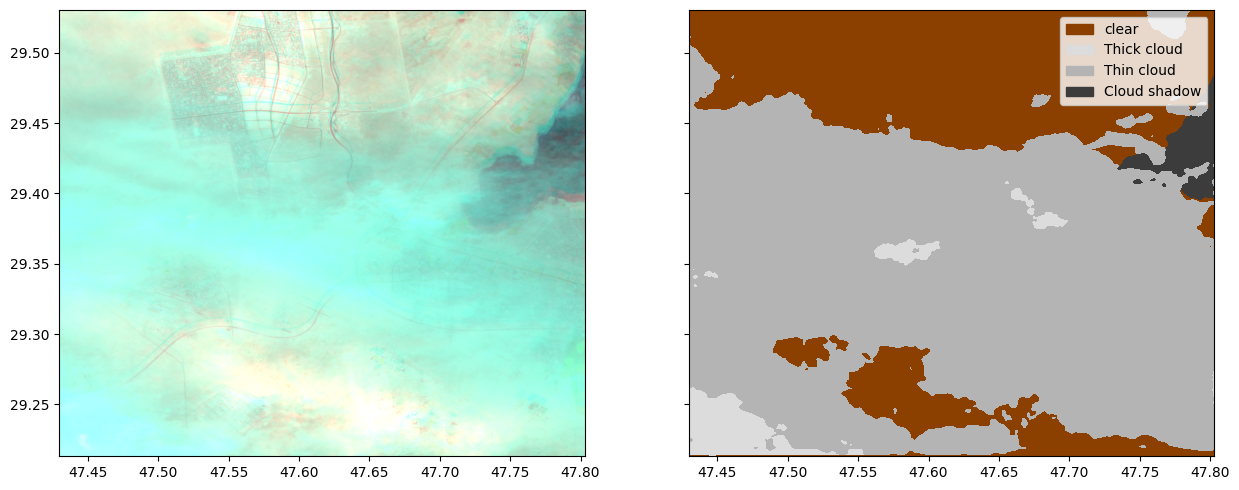

In [12]:
model_4bands = cloudsen12.load_model_by_name(name="dtacs4bands", weights_folder="cloudsen12_models")
cloudmask = model_4bands.predict(s2_image.isel({"band": [S2_SAFE_reader.BANDS_S2_L1C.index(b) for b in model_4bands.bands]}))

fig, ax = plt.subplots(1,2,figsize=(14,5),sharey=True, tight_layout=True)

plot.show(swir_nir_red,ax=ax[0])
cloudsen12.plot_cloudSEN12mask(cloudmask, ax=ax[1])

<Axes: >

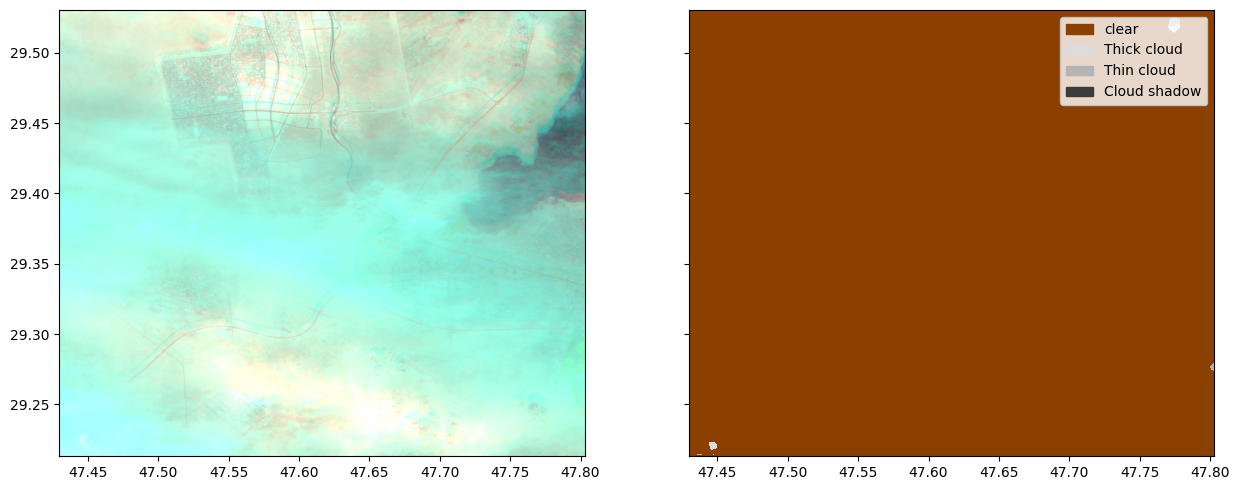

In [15]:
model = cloudsen12.load_model_by_name(name="UNetMobV2_V2", weights_folder="cloudsen12_models")
cloudmask = model.predict(s2_image)

fig, ax = plt.subplots(1,2,figsize=(14,5),sharey=True, tight_layout=True)

plot.show(swir_nir_red,ax=ax[0])
cloudsen12.plot_cloudSEN12mask(cloudmask, ax=ax[1])